In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- 1) Load Excel (same folder as this notebook) ----
FILE = "gym recommendation.xlsx"

# See available sheets
xls = pd.ExcelFile(FILE)
print("Sheets:", xls.sheet_names)

# Load first sheet by default (change if you want another)
df = pd.read_excel(FILE, sheet_name=xls.sheet_names[0])

print("Shape:", df.shape)
display(df.head())
df.info()


Sheets: ['Sheet1']
Shape: (14589, 15)


,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              14589 non-null  int64  
 1   Sex             14589 non-null  object 
 2   Age             14589 non-null  int64  
 3   Height          14589 non-null  float64
 4   Weight          14589 non-null  float64
 5   Hypertension    14589 non-null  object 
 6   Diabetes        14589 non-null  object 
 7   BMI             14589 non-null  float64
 8   Level           14589 non-null  object 
 9   Fitness Goal    14589 non-null  object 
 10  Fitness Type    14589 non-null  object 
 11  Exercises       14589 non-null  object 
 12  Equipment       14589 non-null  object 
 13  Diet            14589 non-null  object 
 14  Recommendation  14589 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.7+ MB


In [2]:
# ---- 2) Quick cleaning helpers (safe defaults) ----
# Strip spaces in column names
df.columns = [c.strip() if isinstance(c, str) else c for c in df.columns]

# Remove fully-empty rows/cols
df = df.dropna(how="all").dropna(axis=1, how="all")

# Try to parse datetime columns automatically (only for object columns that look like dates)
for col in df.select_dtypes(include=["object"]).columns:
    sample = df[col].dropna().astype(str).head(20)
    if len(sample) > 0 and sample.str.contains(r"\d{4}|\d{2}[/\-]\d{2}[/\-]\d{2,4}", regex=True).mean() > 0.6:
        df[col] = pd.to_datetime(df[col], errors="ignore")

print("After cleanup:", df.shape)
display(df.head())


After cleanup: (14589, 15)


,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


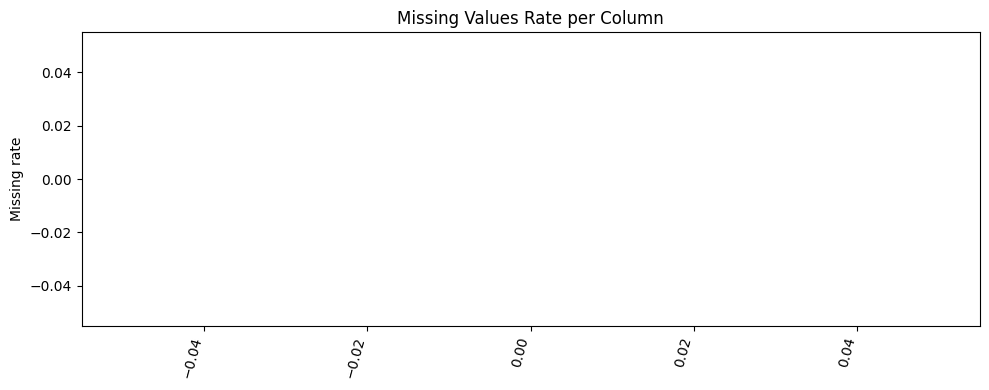

In [3]:
# ---- 3) Overview: missing values ----
missing = df.isna().mean().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10, 4))
plt.title("Missing Values Rate per Column")
plt.bar(missing.index.astype(str), missing.values)
plt.xticks(rotation=75, ha="right")
plt.ylabel("Missing rate")
plt.tight_layout()
plt.show()


Numeric columns: ['ID', 'Age', 'Height', 'Weight', 'BMI']


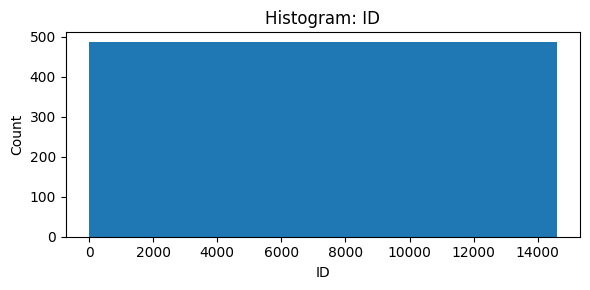

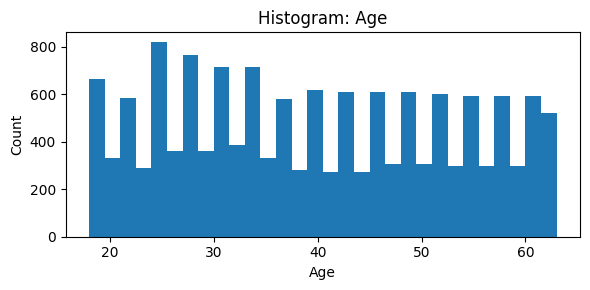

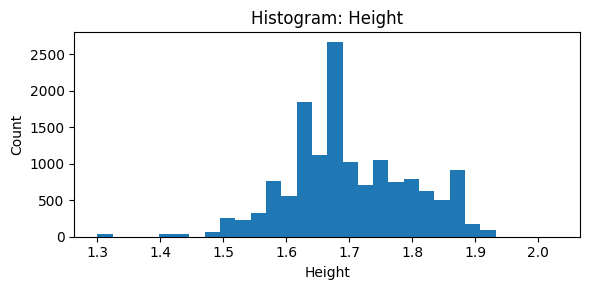

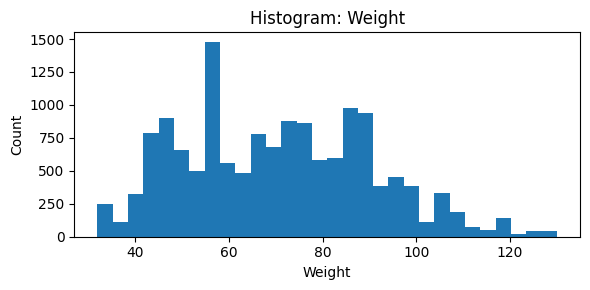

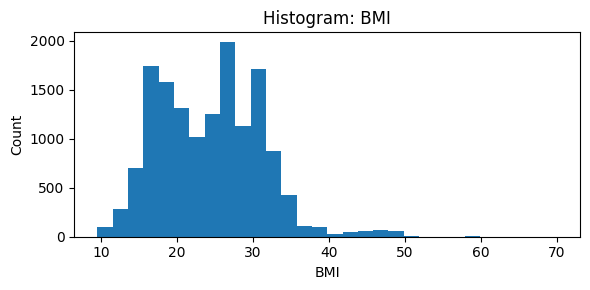

In [4]:
# ---- 4) Numeric columns: histograms ----
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

if num_cols:
    for col in num_cols:
        plt.figure(figsize=(6, 3))
        plt.hist(df[col].dropna(), bins=30)
        plt.title(f"Histogram: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
else:
    print("No numeric columns found.")


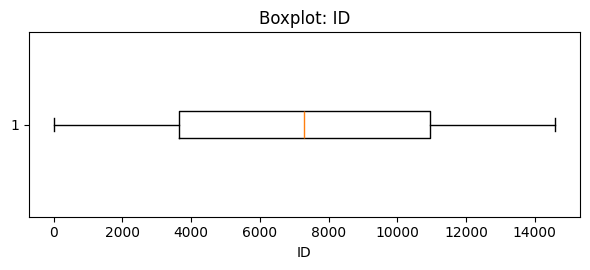

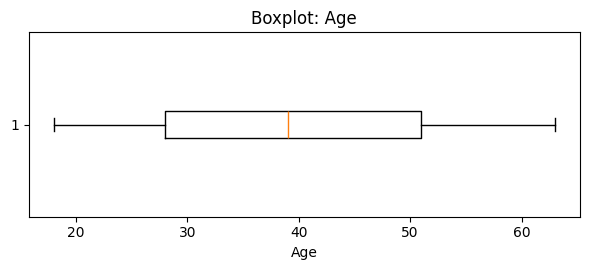

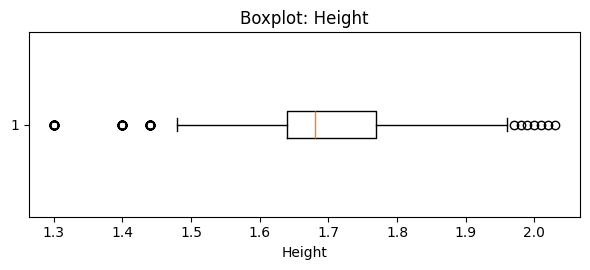

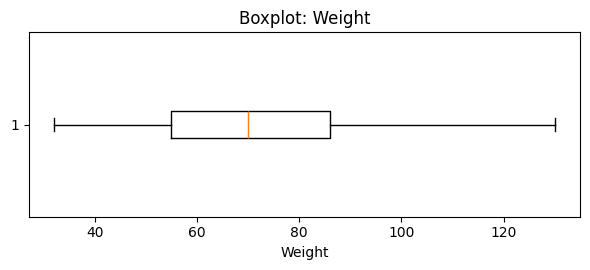

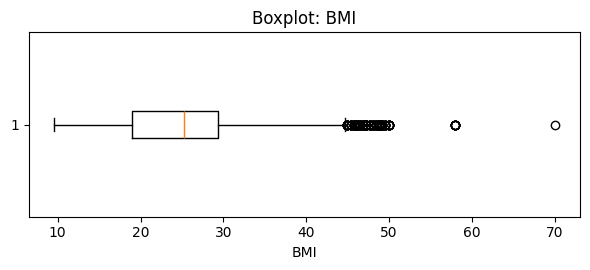

In [5]:
# ---- 5) Numeric columns: boxplots (outliers check) ----
if num_cols:
    for col in num_cols:
        plt.figure(figsize=(6, 2.8))
        plt.boxplot(df[col].dropna(), vert=False)
        plt.title(f"Boxplot: {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


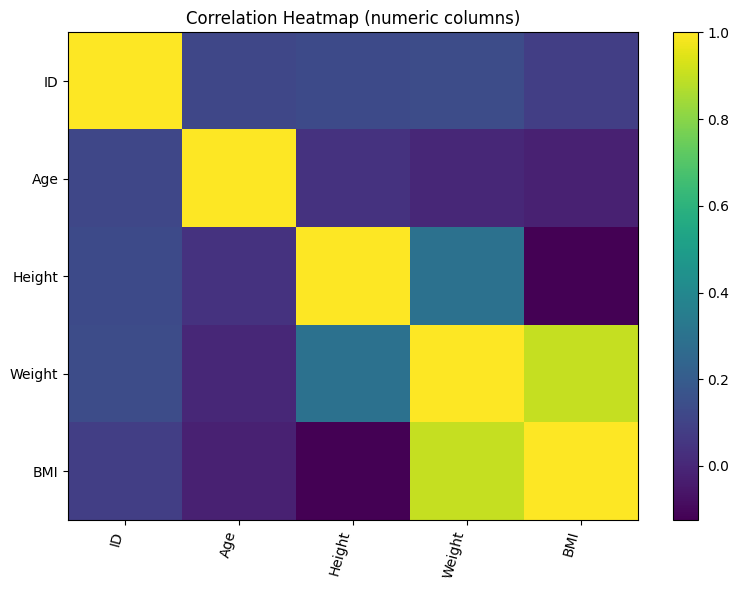

In [6]:
# ---- 6) Correlation heatmap (numeric only) ----
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)

    plt.figure(figsize=(8, 6))
    plt.imshow(corr.values, aspect="auto")
    plt.title("Correlation Heatmap (numeric columns)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=75, ha="right")
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")


Categorical columns: ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment', 'Diet', 'Recommendation']


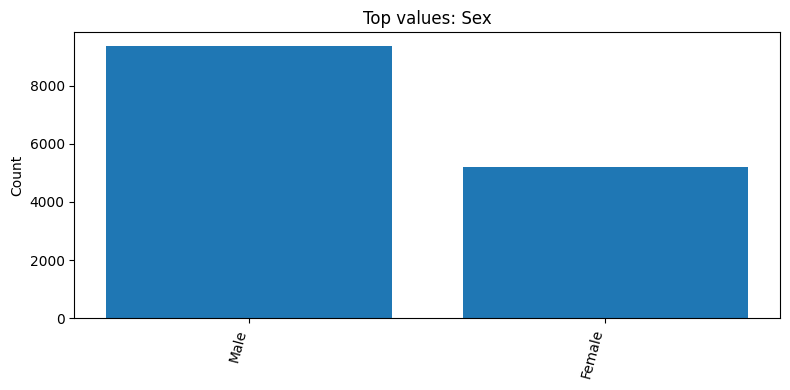

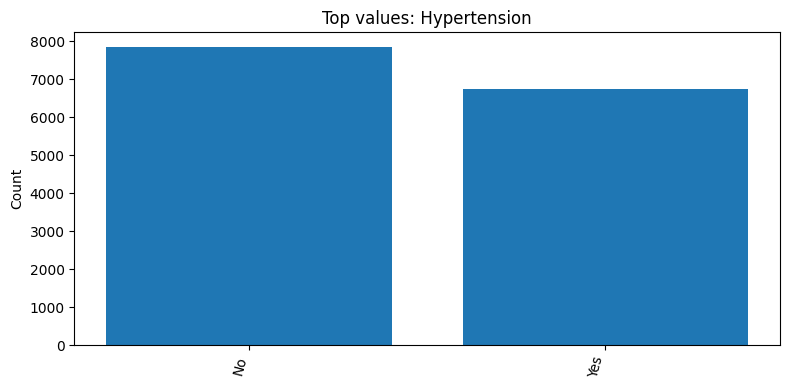

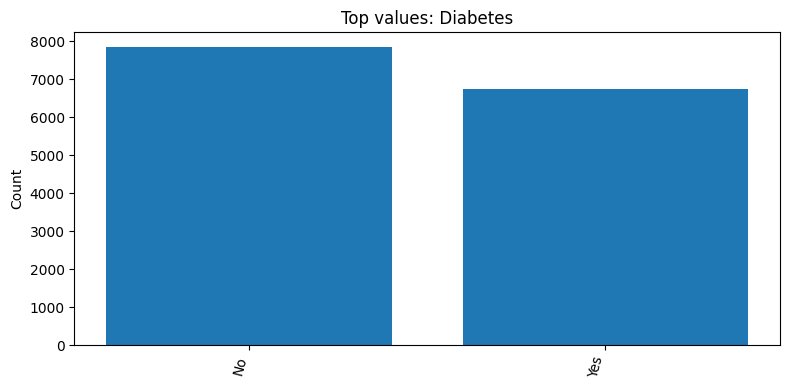

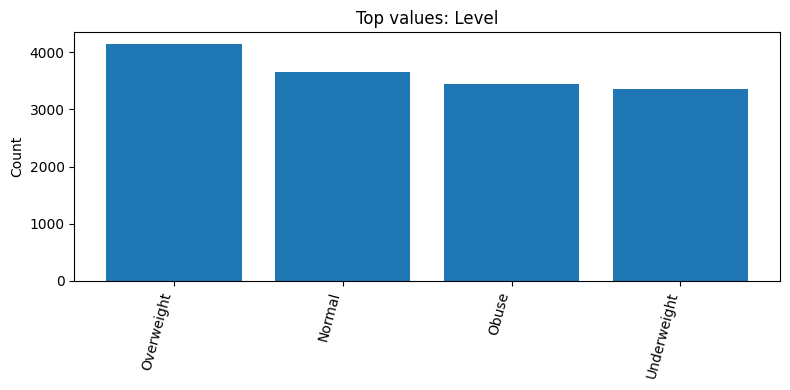

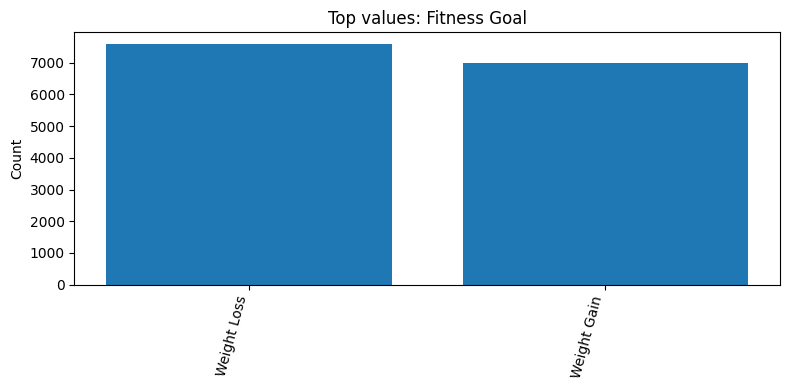

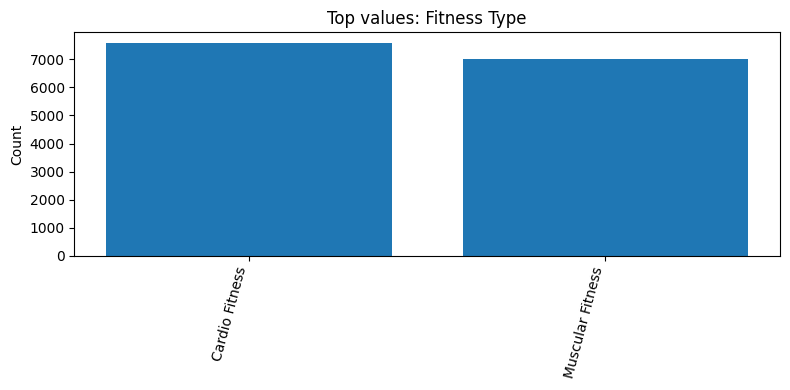

/tmp/ipykernel_271/2798756441.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


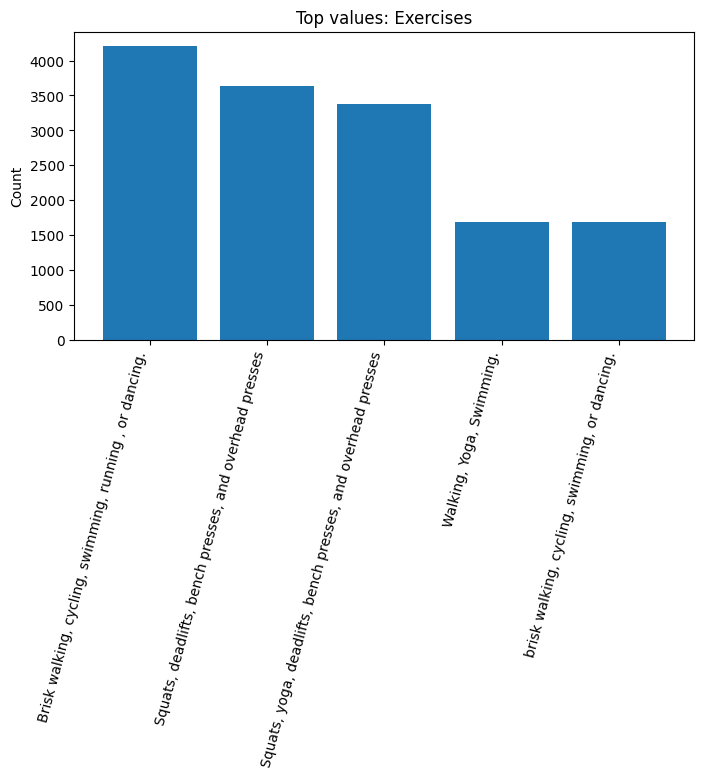

/tmp/ipykernel_271/2798756441.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


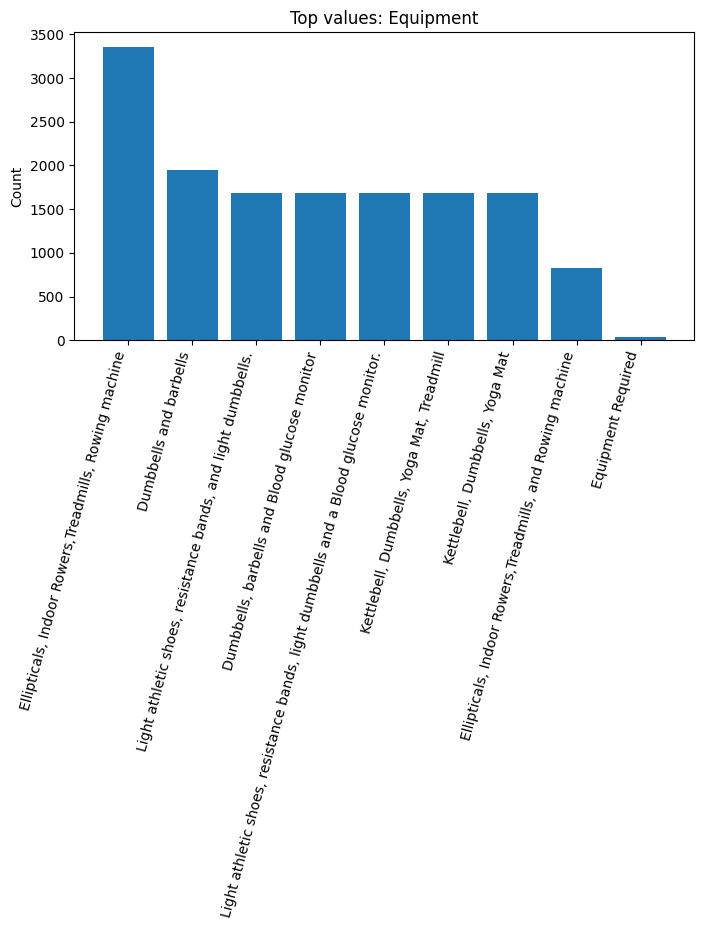

/tmp/ipykernel_271/2798756441.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


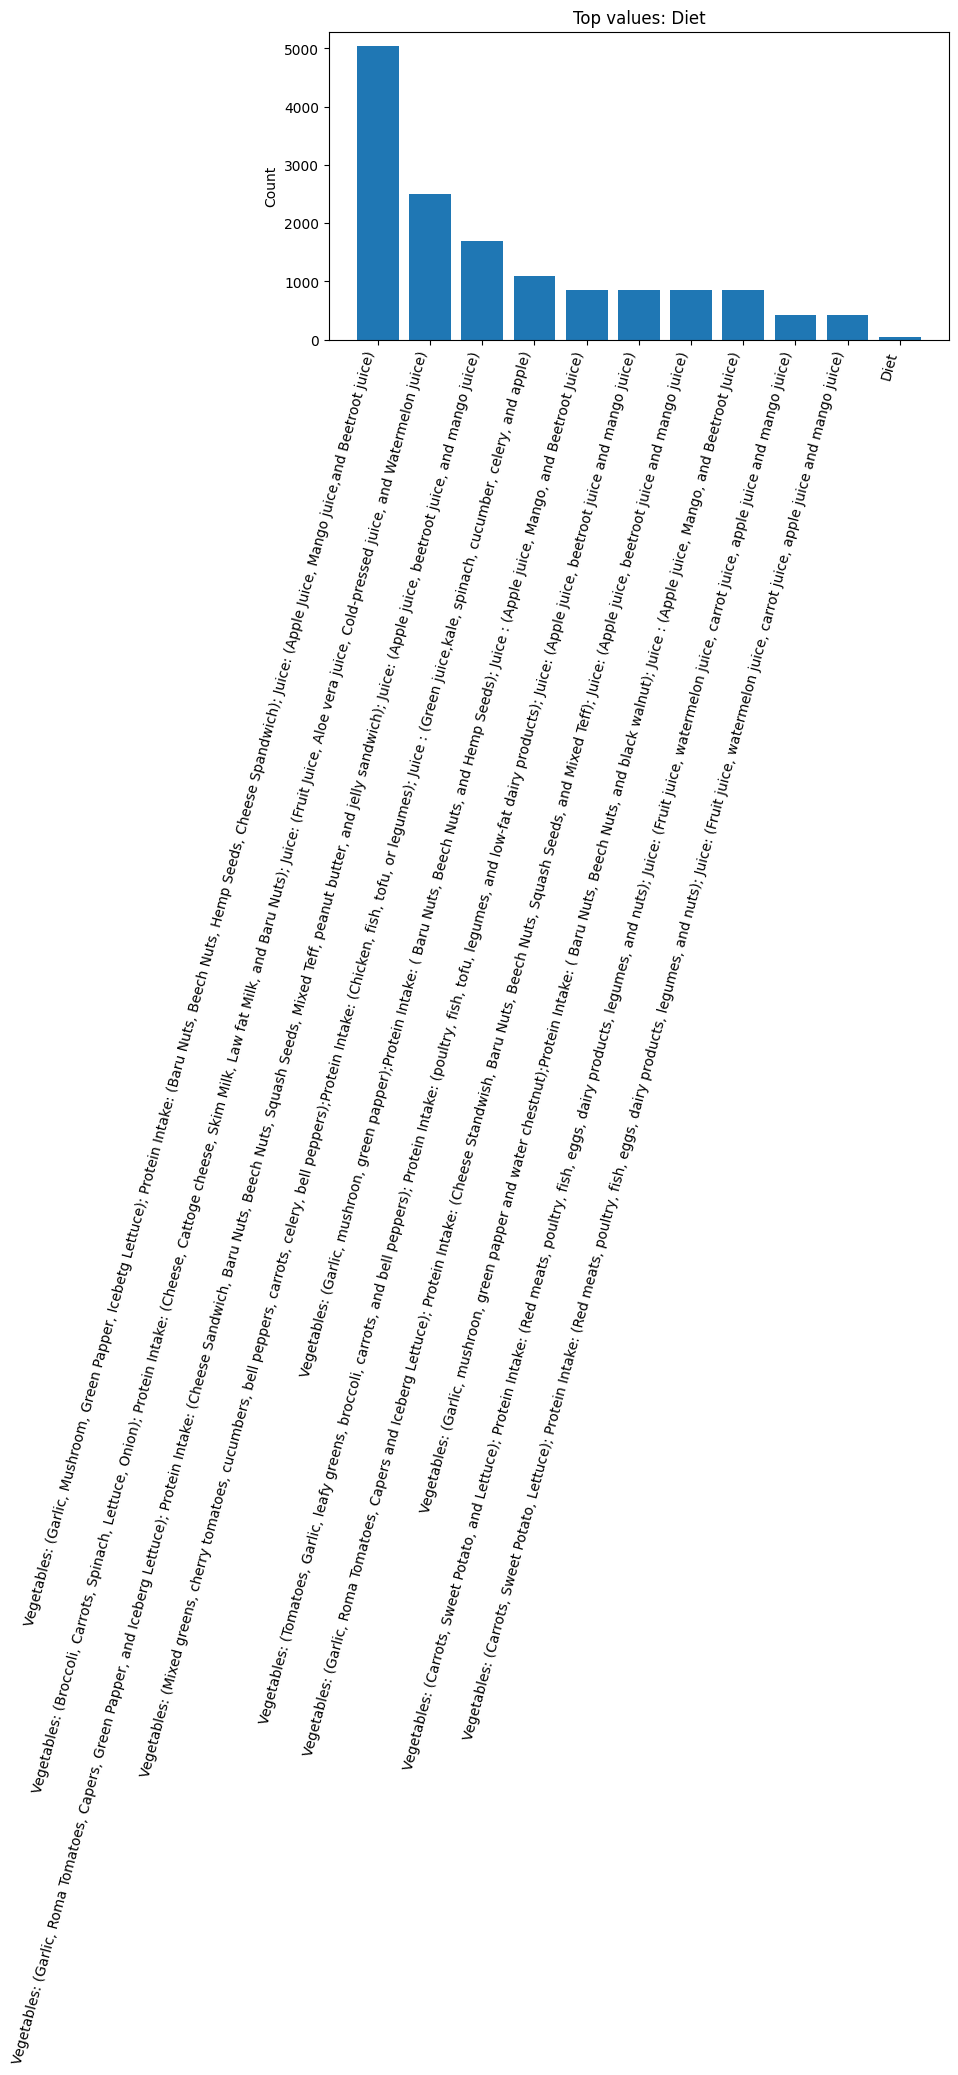

/tmp/ipykernel_271/2798756441.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


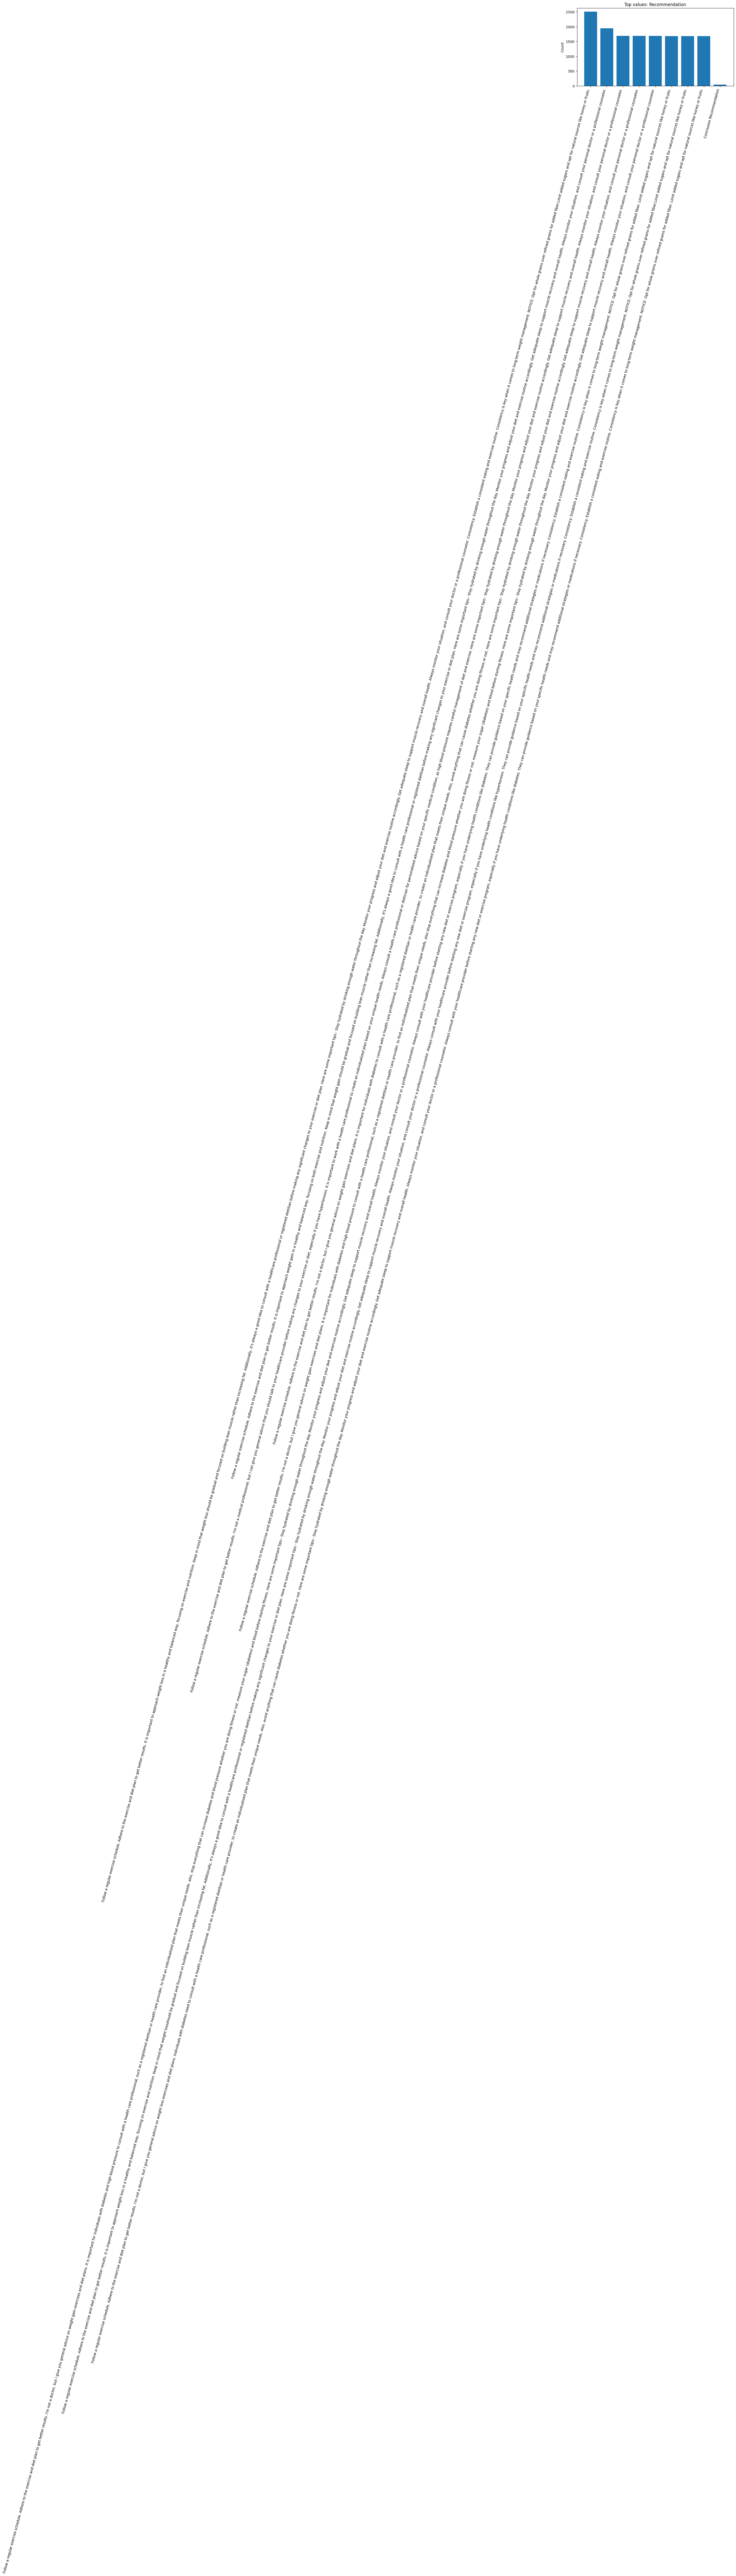

In [7]:
# ---- 7) Categorical columns: top value counts ----
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    vc = df[col].astype(str).value_counts().head(15)
    plt.figure(figsize=(8, 4))
    plt.title(f"Top values: {col}")
    plt.bar(vc.index, vc.values)
    plt.xticks(rotation=75, ha="right")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [8]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
